# BigMart Sales Data

### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,Imputer, OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

### Importing data

In [2]:
train= pd.read_csv('https://datahack-prod.s3.ap-south-1.amazonaws.com/train_file/Train_UWu5bXk.csv')
test= pd.read_csv('https://datahack-prod.s3.ap-south-1.amazonaws.com/test_file/Test_u94Q5KV.csv')

data = pd.concat([train,test], axis=0, ignore_index=True)

In [3]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

### Dealing with missing values

In [6]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [7]:
data['Outlet_Size']= data['Outlet_Size'].fillna('Medium')
data['Item_Weight']= data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [8]:
data['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [9]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

** The above missing values in 'Item_Outlet_Sales' column is from the test set and that is what we need to predict at the end, so let us ignore them for now**

### Correlation between continues variables

In [10]:
 train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [11]:
corr= train.corr()

In [12]:
sns.heatmap(corr)

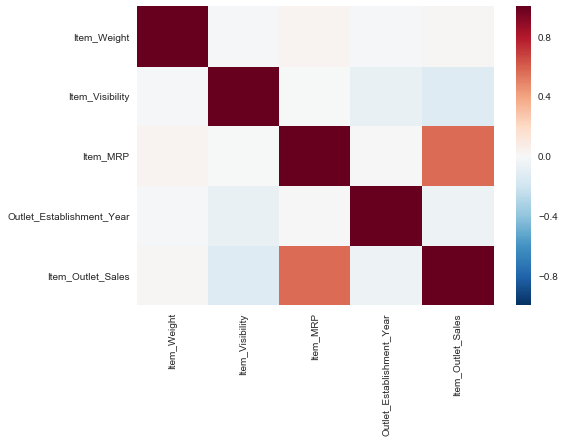

In [13]:
plt.show()

### Dealing with categorical data

In [14]:
labelencoder= LabelEncoder()

data['Item_Fat_Content']= labelencoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']= labelencoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']= labelencoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Location_Type']= labelencoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Size']= labelencoder.fit_transform(data['Outlet_Size'])
data['Outlet_Type']= labelencoder.fit_transform(data['Outlet_Type'])

###  Spliting the data into train and test

In [15]:
train_c= data[0:8523]
test_c= data[8523:]

del test_c['Item_Outlet_Sales']

del train
del test

### Spliting the Independent variables as 'X' and Dependent variable as 'y'

In [16]:
y = train_c['Item_Outlet_Sales'].values
X= train_c.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Establishment_Year'], axis=1).values

### Feature scaling 

In [17]:
scale = StandardScaler()
y = scale.fit_transform(y)

X[:,1]= scale.fit_transform(X[:,1])
X[:,4]= scale.fit_transform(X[:,4])

/Users/Ali/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Ali/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Ali/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

### Creating Dummy variables

In [18]:
onehotencoder= OneHotEncoder(categorical_features=[0])
X= onehotencoder.fit_transform(X).toarray()

In [19]:
X= X[:, 1:]

In [20]:
onehotencoder= OneHotEncoder(categorical_features=[11])
X= onehotencoder.fit_transform(X).toarray()

In [21]:
onehotencoder= OneHotEncoder(categorical_features=[13])
X= onehotencoder.fit_transform(X).toarray()

In [22]:
onehotencoder= OneHotEncoder(categorical_features=[15])
X= onehotencoder.fit_transform(X).toarray()

In [23]:
onehotencoder= OneHotEncoder(categorical_features=[25])
X= onehotencoder.fit_transform(X).toarray()

### Cross validating using train/test/split

In [24]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

### Building ML models 

### 1. Linear Regression

In [25]:
ln = LinearRegression()

In [26]:
ln.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred= ln.predict(X_test)

** Metrics for evaluation**

In [28]:
linearscore=ln.score(X_test, y_test)

In [29]:
linearRMSE=np.sqrt(mean_squared_error(y_test, y_pred))

In [30]:
r2_score(y_test, y_pred)

0.56966984093011697

### 2. Ridge Regression

In [31]:
ridge = Ridge()

In [32]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
y_pred1= ridge.predict(X_test)

In [34]:
ridge.score(X_test, y_test)

0.56970878400881242

** parameter tuning **

In [35]:
param_grid = {'alpha':[0.01,0.1,1,10]}

In [36]:
ridge_cv= GridSearchCV(ridge,param_grid)

In [37]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [38]:
y_pred2= ridge_cv.predict(X_test)

In [39]:
ridgescore=ridge_cv.score(X_test, y_test)

In [40]:
ridgeRMSE=np.sqrt(mean_squared_error(y_test, y_pred2))

### 3. RandomForest

In [41]:
random = RandomForestRegressor()

In [42]:
random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [43]:
y_pred3= random.predict(X_test)

In [44]:
random.score(X_test, y_test)

0.54214171449045945

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred3))

0.65865635430109748

** parameter tuning**

In [46]:
param= {'n_estimators':[120,200,300],
        'max_depth':[5,8,15],
          'max_features':['log2', 'sqrt', 'auto']}

In [47]:
random_cv= GridSearchCV(random, param)

In [48]:
random_cv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [120, 200, 300], 'max_depth': [5, 8, 15], 'max_features': ['log2', 'sqrt', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [49]:
y_pred4= random_cv.predict(X_test)

In [50]:
randomscore=random_cv.score(X_test, y_test)

In [51]:
randomRMSE=np.sqrt(mean_squared_error(y_test, y_pred4))

* We can clearly see above that by doing parameter tuning accuracy has increased from 53 to 60 percentage

In [52]:
models = pd.DataFrame({'Models':['Linear','Ridge', 'RandomForest'],
                        'Scores':[linearscore,ridgescore, randomscore],
                          'RMSE': [linearRMSE,ridgeRMSE, randomRMSE]})

In [53]:
models

,Models,RMSE,Scores
0,Linear,0.638549,0.569670
1,Ridge,0.638360,0.569924
2,RandomForest,0.612201,0.604450


** Here we can clearly see that RandomForest is doing pretty good when compare to other models, so lets choose that model for prediction **